In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.bezier as bezier
from scipy.special import comb


In [91]:

class Ray:
    """
    The Ray class defines a ray in 2D space. The ray is launched from the 
    initial position x_init, y_init and the direction is defined by theta.
    """
    courant_number_2D = 1 # courant_number_2d < c_max = 1/sqrt(2) for two dimensions
    velocity = 400
    dx = dy = 1e-6

    def __init__(self, x_init, y_init, theta):
        self.x_init = x_init
        self.y_init = y_init
        self.theta = theta
        self.velocity_x = self.velocity * np.cos(self.theta)
        self.velocity_y = self.velocity * np.sin(self.theta)
        self.dt = Ray.courant_number_2D * min(Ray.dx, Ray.dy) / np.sqrt(self.velocity_x**2 + self.velocity_y**2)


    def next_position(self, grid_vector_field_gradient):
        """
        Returns the next position of the ray at time t and updates initial positions.
        Recalculates the time step based on the current velocity.
        Updates velocity based on the grid vector field.
        """
        # get cell position of ray 
        x_cell = int(self.x_init / Ray.dx)
        y_cell = int(self.y_init / Ray.dy)

        # get gradient of vector field at cell position
        self.velocity_x = self.velocity * np.cos(self.theta) + grid_vector_field_gradient[x_cell, y_cell, 0]
        self.velocity_y = self.velocity * np.sin(self.theta) + grid_vector_field_gradient[x_cell, y_cell, 1]
        print(self.velocity_x, self.velocity_y)

        # calculate time step based on velocity
        self.dt = Ray.courant_number_2D * min(Ray.dx, Ray.dy) / np.sqrt(self.velocity_x**2 + self.velocity_y**2)

        # calculate next position
        x = self.x_init + self.velocity_x * self.dt
        y = self.y_init + self.velocity_y * self.dt

        # update initial position
        self.x_init = x
        self.y_init = y

        return x, y
        

282.96459378775035 282.82415186855843
283.08645283994485 282.8055946524882
283.2082896358956 282.7870408256937
283.20580362478523 282.7874194060658
283.2033176044091 282.787797987849
283.20083157476716 282.7881765710432
283.19834553585935 282.78855515564845
283.1958594876856 282.7889337416648
283.1933734302459 282.7893123290921
283.19088736354024 282.78969091793056
283.1884012875685 282.79006950818007
283.1859152023307 282.79044809984066
283.1834291078268 282.79082669291233
283.1809430040567 282.7912052873951
283.17845689102046 282.7915838832889
283.175970768718 282.7919624805939
283.1734846371493 282.79234107930995
283.1709984963142 282.79271967943714
283.16851234621276 282.7930982809754
283.16602618684493 282.7934768839248
283.1635400182107 282.7938554882854
283.16105384031 282.79423409405706
283.15856765314277 282.7946127012399
283.156081456709 282.79499130983385
283.1535952510086 282.795369919839
283.1511090360416 282.7957485312553
283.1486228118079 282.7961271440828
283.1461365783

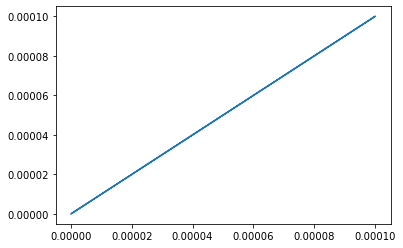

In [97]:


grid_resolution = 100
grid_cell_size = 1e-6
# define grid vector field for 2D space with linear gradient in y direction from 1 to 4 and linear gradient in x direction from 2 to 3
grid_vector_field = np.zeros((grid_resolution, grid_resolution, 2))
grid_vector_field[:, :, 1] = np.linspace(10, 40, grid_resolution).reshape(grid_resolution, 1)
grid_vector_field[:, :, 0] = np.linspace(200, 3, grid_resolution).reshape(1, grid_resolution)
# gradient of the grid vector field calculated numerically using central difference method. roll the vectors to the left and right to calculate the gradient
grid_vector_field_gradient = np.zeros((grid_resolution, grid_resolution, 2))
grid_vector_field_gradient[:, :, 0] = np.roll(grid_vector_field[:, :, 0], -1, axis=1) - np.roll(grid_vector_field[:, :, 0], 1, axis=1)
grid_vector_field_gradient[:, :, 1] = np.roll(grid_vector_field[:, :, 1], -1, axis=0) - np.roll(grid_vector_field[:, :, 1], 1, axis=0)
grid_vector_field_gradient /= 2 * grid_cell_size

# define ray
ray = Ray(0, 0, np.pi/4)

# define arrays to store the ray positions
x = np.zeros(1000)
y = np.zeros(1000)

# calculate ray positions using the gradient of the grid vector field until the ray leaves the grid
for i in range(1000):
    x[i], y[i] = ray.next_position(grid_vector_field_gradient)
    if x[i] > grid_resolution * grid_cell_size or y[i] > grid_resolution * grid_cell_size:
        break
    

# plot the ray positions
plt.plot(x, y)
plt.show()



In [93]:
# generate 100 rays from the left edge of the grid and directions and store their paths in a list ray_path_seed
Ray.courant_number_2D = .5

ray_paths_seed = []
for i in range(10):
    ray = Ray(0, grid_cell_size * grid_resolution/2 + i / 1 * grid_cell_size, 0)
    ray_path = np.array([ray.x_init, ray.y_init])
    while ray.x_init < grid_resolution * grid_cell_size and ray.y_init < grid_resolution * grid_cell_size:
        x, y = ray.next_position(grid_vector_field)
        # append new position to ray path
        ray_path = np.vstack((ray_path, np.array([x, y])))
    ray_paths_seed.append(ray_path)

# generate rays from the bottom of the grid and store their paths in a separate list ray_paths_pump
ray_paths_pump = []
for i in range(10):
    ray = Ray(grid_cell_size * grid_resolution/2 + i / 1 * grid_cell_size, 0, np.pi/2)
    ray_path = np.array([ray.x_init, ray.y_init])
    while ray.x_init < grid_resolution * grid_cell_size and ray.y_init < grid_resolution * grid_cell_size:
        x, y = ray.next_position(grid_vector_field)
        # append new position to ray path
        ray_path = np.vstack((ray_path, np.array([x, y])))
    ray_paths_pump.append(ray_path)


400.0 1.25e-09
400.0 2.5e-09
400.0 4.242424242424243e-09
400.0 5.9848484848484856e-09
400.0 8.21969696969697e-09
400.0 1.0454545454545455e-08
400.0 1.3181818181818181e-08
400.0 1.5909090909090908e-08
400.0 1.912878787878788e-08
400.0 2.234848484848485e-08
400.0 2.6060606060606062e-08
400.0 2.9772727272727275e-08
400.0 3.397727272727273e-08
400.0 3.818181818181818e-08
400.0 4.287878787878788e-08
400.0 4.757575757575758e-08
400.0 5.276515151515152e-08
400.0 5.795454545454546e-08
400.0 6.363636363636363e-08
400.0 6.931818181818181e-08
400.0 7.549242424242423e-08
400.0 8.166666666666666e-08
400.0 8.833333333333332e-08
400.0 9.499999999999999e-08
400.0 1.021590909090909e-07
400.0 1.0931818181818181e-07
400.0 1.1696969696969695e-07
400.0 1.246212121212121e-07
400.0 1.327651515151515e-07
400.0 1.4090909090909089e-07
400.0 1.4954545454545453e-07
400.0 1.5818181818181817e-07
400.0 1.6731060606060606e-07
400.0 1.7643939393939393e-07
400.0 1.8606060606060604e-07
400.0 1.9568181818181816e-07
400.0

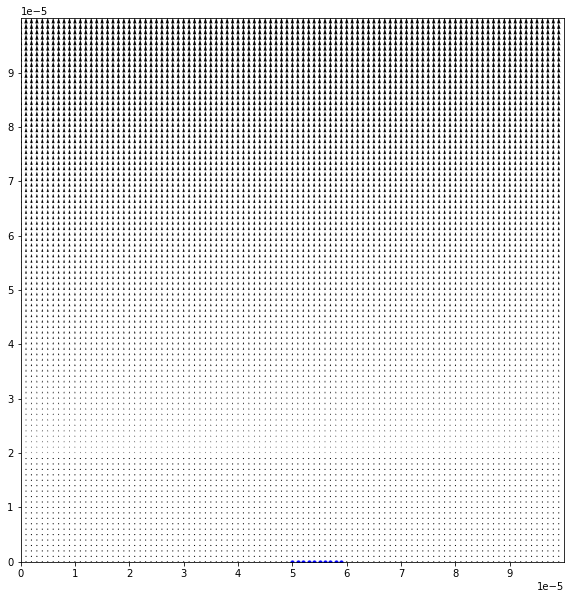

In [78]:

# plot ray path for all rays in the list
fig, ax = plt.subplots()
# figure size larger
fig.set_size_inches(10, 10)
ax.set_aspect('equal')
ax.set_xlim(0, grid_resolution * grid_cell_size)
ax.set_ylim(0, grid_resolution * grid_cell_size)
ax.set_xticks(np.arange(0, grid_resolution * grid_cell_size, grid_cell_size*10))
ax.set_yticks(np.arange(0, grid_resolution * grid_cell_size, grid_cell_size*10))

ax.quiver(np.arange(0, grid_resolution * grid_cell_size, grid_cell_size),
            np.arange(0, grid_resolution * grid_cell_size, grid_cell_size),
            grid_vector_field[:, :, 0], grid_vector_field[:, :, 1], color='k')

for ray_path in ray_paths_seed:
    # ax.plot(ray_path[:, 0], ray_path[:, 1], color='r')
    # scatter all points
    ax.scatter(ray_path[:, 0], ray_path[:, 1], color='r', s=10)

for ray_path in ray_paths_pump:
    ax.scatter(ray_path[:, 0], ray_path[:, 1], color='b', s=10)

plt.show()




In [8]:
# get size in bytes of the ray paths
import sys
print("Size of ray paths in bytes: ", sys.getsizeof(ray_paths_seed) + sys.getsizeof(ray_paths_pump))


Size of ray paths in bytes:  1840


In [31]:
# redo this whole exercise in 3D space
# define grid vector field for 3D space with linear gradient in z direction from 1 to 4 and linear gradient in x direction from 1 to 2
grid_resolution_3D = 100
grid_vector_field_3D = np.zeros((grid_resolution_3D, grid_resolution_3D, grid_resolution_3D, 3))
grid_vector_field_3D[:, :, :, 2] = np.linspace(1, 4, grid_resolution_3D).reshape(grid_resolution_3D, 1, 1)
grid_vector_field_3D[:, :, :, 0] = np.linspace(1, 2, grid_resolution_3D).reshape(1, grid_resolution_3D, 1)


In [10]:
# redefine ray class for 3D space
class Ray3D:
    courant_number_3D = 0.1
    velocity = 4000
    dx = dy = dz = 1e-6

    def __init__(self, x_init, y_init, z_init, theta, phi):
        self.x_init = x_init
        self.y_init = y_init
        self.z_init = z_init
        self.theta = theta
        self.phi = phi
        self.velocity_x = self.velocity * np.sin(self.theta) * np.cos(self.phi)
        self.velocity_y = self.velocity * np.sin(self.theta) * np.sin(self.phi)
        self.velocity_z = self.velocity * np.cos(self.theta)
        self.dt = Ray3D.courant_number_3D * min(Ray3D.dx, Ray3D.dy, Ray3D.dz) / np.sqrt(self.velocity_x**2 + self.velocity_y**2 + self.velocity_z**2)


    def next_position(self, grid_vector_field):
        """
        Returns the next position of the ray at time t and updates initial positions.
        Recalculates the time step based on the current velocity.
        Updates velocity based on the grid vector field.
        """
        # update velocity based on grid vector field
        self.velocity_x += grid_vector_field[int(self.x_init/self.dx), int(self.y_init/self.dy), int(self.z_init/self.dz), 0]
        self.velocity_y += grid_vector_field[int(self.x_init/self.dx), int(self.y_init/self.dy), int(self.z_init/self.dz), 1]
        self.velocity_z += grid_vector_field[int(self.x_init/self.dx), int(self.y_init/self.dy), int(self.z_init/self.dz), 2]

        # calculate time step based on velocity
        self.dt = self.courant_number_3D * min(self.dx, self.dy, self.dz) / np.sqrt(self.velocity_x**2 + self.velocity_y**2 + self.velocity_z**2)

        # calculate next position
        x = self.x_init + self.velocity_x * self.dt
        y = self.y_init + self.velocity_y * self.dt
        z = self.z_init + self.velocity_z * self.dt

        # update initial position
        self.x_init = x
        self.y_init = y
        self.z_init = z

        return x, y, z
    

In [32]:
# generate initial positions of rays within a disc of radius 10 grid cells in the middle of the xz plane
# and store their paths in a list called ray_paths_seed_3D
ray_paths_seed_3D = []
for i in range(100):
    for j in range(100):
        if(np.sqrt((i - 50)**2 + (j - 50)**2) < 10):
            ray = Ray3D(i * grid_cell_size, 0, j * grid_cell_size, np.pi/2, np.pi/2)
            ray_path = np.array([ray.x_init, ray.y_init, ray.z_init])
            while ray.x_init < grid_resolution_3D * grid_cell_size and ray.y_init < grid_resolution_3D * grid_cell_size and ray.z_init < grid_resolution_3D * grid_cell_size:
                ray_path = np.vstack((ray_path, ray.next_position(grid_vector_field_3D)))
            ray_paths_seed_3D.append(ray_path)

# generate initial positions of rays within a disc of radius 10 grid cells in the middle of the xy plane
# and store their paths in a list called ray_paths_pump_3D
ray_paths_pump_3D = []
for i in range(100):
    for j in range(100):
        if(np.sqrt((i - 50)**2 + (j - 50)**2) < 10):
            ray = Ray3D(i * grid_cell_size, j * grid_cell_size, 0, 0, 0)
            ray_path = np.array([ray.x_init, ray.y_init, ray.z_init])
            while ray.x_init < grid_resolution_3D * grid_cell_size and ray.y_init < grid_resolution_3D * grid_cell_size and ray.z_init < grid_resolution_3D * grid_cell_size:
                ray_path = np.vstack((ray_path, ray.next_position(grid_vector_field_3D)))
            ray_paths_pump_3D.append(ray_path)
            

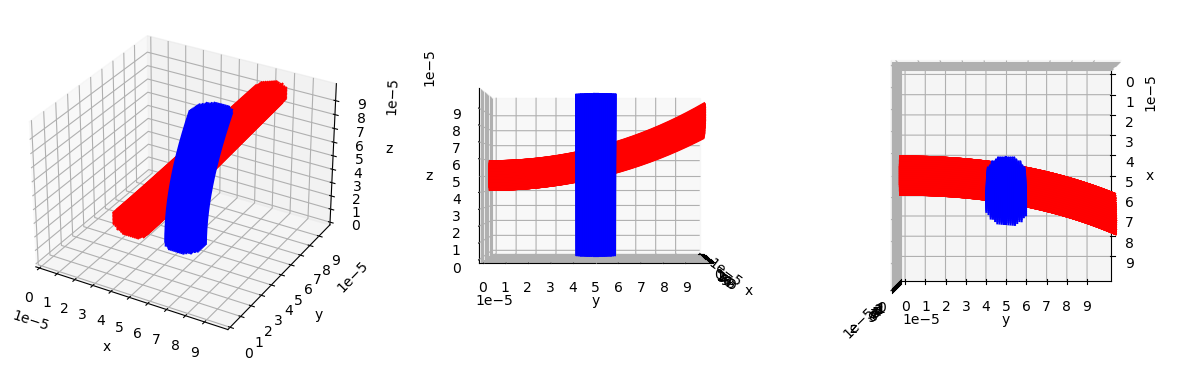

In [40]:
# plot ray path for all rays in the list

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(131, projection='3d')
ax.set_aspect('auto')
ax.set_xlim(0, grid_resolution_3D * grid_cell_size)
ax.set_ylim(0, grid_resolution_3D * grid_cell_size)
ax.set_zlim(0, grid_resolution_3D * grid_cell_size)
ax.set_xticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_yticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_zticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
# label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ray_path in ray_paths_seed_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='r')

for ray_path in ray_paths_pump_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='b')


ax = fig.add_subplot(132, projection='3d')
ax.set_aspect('auto')
ax.set_xlim(0, grid_resolution_3D * grid_cell_size)
ax.set_ylim(0, grid_resolution_3D * grid_cell_size)
ax.set_zlim(0, grid_resolution_3D * grid_cell_size)
ax.set_xticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_yticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_zticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
# label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ray_path in ray_paths_seed_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='r')

for ray_path in ray_paths_pump_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='b')

# reposition camera to view the plot from the yz side
ax.view_init(0,0)


ax = fig.add_subplot(133, projection='3d')
ax.set_aspect('auto')
ax.set_xlim(0, grid_resolution_3D * grid_cell_size)
ax.set_ylim(0, grid_resolution_3D * grid_cell_size)
ax.set_zlim(0, grid_resolution_3D * grid_cell_size)
ax.set_xticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_yticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
ax.set_zticks(np.arange(0, grid_resolution_3D * grid_cell_size, grid_cell_size*10))
# label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ray_path in ray_paths_seed_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='r')

for ray_path in ray_paths_pump_3D:
    ax.plot(ray_path[:, 0], ray_path[:, 1], ray_path[:, 2], color='b')

# reposition camera to view the plot from the yz side
ax.view_init(90,0)

